## Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from readability import Readability
from itertools import combinations
import scipy.stats
import itertools
from tqdm import tqdm
import os

In [2]:
model_dir = os.environ.get('READABILITY_ANALYSIS_MODEL_DIR')

In [3]:
survey_df = pd.read_csv(model_dir + 'df_post_survey_all.csv')

<Axes: xlabel='article_read_ease', ylabel='Count'>

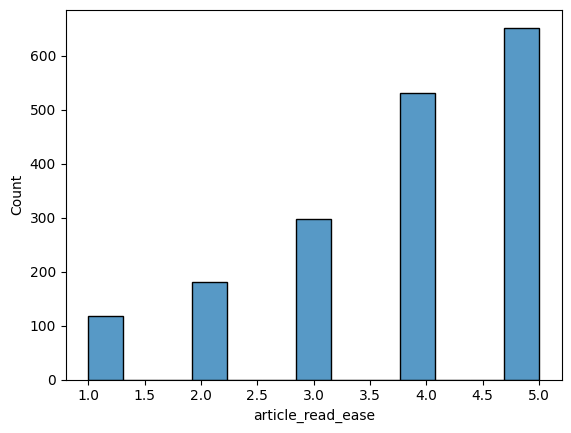

In [4]:
sns.histplot(survey_df['article_read_ease'])

In [5]:
metric_names = [
          "linsear_write",
          "spache",
          "flesch",
          "ari",
          "gunning_fog",
          "dale_chall",
          "coleman_liau",
          "flesch_kincaid",
           ]
def get_readability_metrics(text):
  r = Readability(text)
  scores = {}
  for m_name in metric_names:
    f = getattr(r, m_name)
    try:
      scores[m_name] = f().score
    except:
      scores[m_name] = -1
  return scores

In [6]:
clean_summ_df = pd.read_csv(model_dir + "cleaned_summaries.csv")
clean_summ_df.head()

,name,textVersion,studyName,cleanText,r-flesch_kincaid,r-gunning_fog,r-coleman_liau,r-dale_chall,r-ari,r-linsear_write,...,s-article_interest,s-valuable_info,r-flesch,r-Llama-3.1-8B-Instruct,r-Llama-3.3-70B-Instruct,r-Mistral-7B-Instruct-v0.3,r-Mixtral-8x7B-Instruct-v0.1,r-OLMo-2-1124-7B-Instruct,r-OLMo-2-1124-13B-Instruct,r-gemma-7b-it
0,redditCommentsARDS,Low,text_expert (Study 1),Scientists create a device which can detect th...,14.942389,18.585356,12.726358,11.273107,16.659181,19.500000,...,3.478261,4.086957,37.221190,4.0,4.0,3.5,4.0,4.0,4.0,3.0
1,redditCommentsARDS,Low,text_gpt3 (Study 2),"\r\n\r\nWhen someone has a lung problem, docto...",8.867698,11.420317,8.966870,7.890558,9.662152,11.769231,...,3.478261,4.086957,65.936861,3.0,4.0,4.5,3.0,4.0,3.0,3.0
2,redditCommentsARDS,Low,text_gpt3.5 (Study 3),A portable device that uses a special type of ...,12.374026,15.856603,11.684583,9.480587,13.676727,15.908163,...,3.478261,4.086957,47.756663,4.0,4.0,4.5,4.0,4.0,4.0,4.0
3,redditCommentsARDS,Medium,text_expert (Study 1),Researchers create a device and an algorithm t...,15.999615,19.625819,14.187861,12.550911,17.829875,20.416667,...,3.312500,4.312500,29.641421,4.0,4.0,3.5,4.0,4.0,4.0,3.0
4,redditCommentsARDS,Medium,text_gpt3 (Study 2),\r\n\r\nA portable two-dimensional gas chromat...,14.178560,17.578421,13.980442,11.671694,14.185263,15.529412,...,3.312500,4.312500,29.809868,4.0,4.0,3.5,4.0,4.0,4.0,3.0


In [7]:
scores = clean_summ_df["cleanText"].apply(get_readability_metrics)
for m_name in metric_names:
  m_scores = scores.apply(lambda r: r[m_name])
  clean_summ_df[f"r-{m_name}"] = m_scores

In [8]:
def read_model_outputs(model_name, prompt_name):
    model_name = f"{model_name}-{prompt_name}"
    tmp = pd.read_csv(model_dir + f"{model_name}.csv")
    sub_name = model_name.split("/")[1]
    clean_summ_df[f"r-{sub_name}"] = tmp['reading_ease']

In [9]:
## Llama-3.1-8B-Instruct
read_model_outputs("meta-llama/Llama-3.1-8B-Instruct", "ASCB")
read_model_outputs("meta-llama/Llama-3.1-8B-Instruct", "own_reasoning")
read_model_outputs("meta-llama/Llama-3.1-8B-Instruct", "simple_prompt")

In [10]:
# Llama-3.3-70B-Instruct
read_model_outputs("meta-llama/Llama-3.3-70B-Instruct", "ASCB")
read_model_outputs("meta-llama/Llama-3.3-70B-Instruct", "own_reasoning")
read_model_outputs("meta-llama/Llama-3.3-70B-Instruct", "simple_prompt")

In [11]:
# Mistral AI
read_model_outputs("mistralai/Mistral-7B-Instruct-v0.3", "ASCB")
read_model_outputs("mistralai/Mistral-7B-Instruct-v0.3", "own_reasoning")
read_model_outputs("mistralai/Mistral-7B-Instruct-v0.3", "simple_prompt")
read_model_outputs("mistralai/Mixtral-8x7B-Instruct-v0.1", "ASCB")
read_model_outputs("mistralai/Mixtral-8x7B-Instruct-v0.1", "own_reasoning")
read_model_outputs("mistralai/Mixtral-8x7B-Instruct-v0.1", "simple_prompt")

In [12]:
## gemma-7b-it 
read_model_outputs("google/gemma-1.1-7b-it", "ASCB")
read_model_outputs("google/gemma-1.1-7b-it", "own_reasoning")
read_model_outputs("google/gemma-1.1-7b-it", "simple_prompt")

In [13]:
all_model_names =  [
                    "Mistral-7B-Instruct-v0.3-ASCB",
                    "Mistral-7B-Instruct-v0.3-own_reasoning",
                    "Mistral-7B-Instruct-v0.3-simple_prompt",
                    "Mixtral-8x7B-Instruct-v0.1-ASCB",
                    "Mixtral-8x7B-Instruct-v0.1-own_reasoning",
                    "Mixtral-8x7B-Instruct-v0.1-simple_prompt",
                    'gemma-1.1-7b-it-ASCB',
                    'gemma-1.1-7b-it-own_reasoning',
                    'gemma-1.1-7b-it-simple_prompt',
                    'Llama-3.1-8B-Instruct-ASCB',
                    'Llama-3.1-8B-Instruct-own_reasoning',
                    'Llama-3.1-8B-Instruct-simple_prompt',
                    'Llama-3.3-70B-Instruct-ASCB',
                    'Llama-3.3-70B-Instruct-own_reasoning',
                    'Llama-3.3-70B-Instruct-simple_prompt',
                    ]

In [14]:
all_paper_names = clean_summ_df["name"].unique()
text_versions = clean_summ_df["textVersion"].unique()
study_nums = [1, 2, 3]
all_summary_types = list(itertools.product(all_paper_names, text_versions, study_nums))

In [15]:
def get_mean_attr_value(df, paper_name, text_version, study, attr):
  tmp = df[df['paperId']==paper_name]
  tmp = tmp[tmp['study']==study]
  tmp = tmp[tmp['complexityLevel']==text_version]
  return tmp[attr].mean()

avg_attr_values = {}
attr_names = ['article_read_ease','article_understanding', 'article_interest', 'valuable_info']
for attr_name in attr_names:
  this_attr = []
  for paper_name, t_version, study_name in all_summary_types:
    mean_attr = get_mean_attr_value(survey_df, paper_name, t_version, study_name, attr_name)
    this_attr.append(mean_attr)
  clean_summ_df[f"s-{attr_name}"] = this_attr

In [16]:
all_model_names

['Mistral-7B-Instruct-v0.3-ASCB',
 'Mistral-7B-Instruct-v0.3-own_reasoning',
 'Mistral-7B-Instruct-v0.3-simple_prompt',
 'Mixtral-8x7B-Instruct-v0.1-ASCB',
 'Mixtral-8x7B-Instruct-v0.1-own_reasoning',
 'Mixtral-8x7B-Instruct-v0.1-simple_prompt',
 'gemma-1.1-7b-it-ASCB',
 'gemma-1.1-7b-it-own_reasoning',
 'gemma-1.1-7b-it-simple_prompt',
 'Llama-3.1-8B-Instruct-ASCB',
 'Llama-3.1-8B-Instruct-own_reasoning',
 'Llama-3.1-8B-Instruct-simple_prompt',
 'Llama-3.3-70B-Instruct-ASCB',
 'Llama-3.3-70B-Instruct-own_reasoning',
 'Llama-3.3-70B-Instruct-simple_prompt']

## Correlations

In [17]:
all_metric_names = metric_names + all_model_names
n_metrics = len(all_metric_names)
attr_metric_combos = list(itertools.product(all_metric_names, attr_names))
all_correlations_pearson = np.zeros((n_metrics, len(attr_names)))
all_correlations_kt = np.zeros((n_metrics, len(attr_names)))
neg_metrics = ["coleman_liau", "dale_chall", "gunning_fog", "spache","ari", "flesch_kincaid"]
for m_idx, metric_name in enumerate(all_metric_names):
  for a_idx, attr_name in enumerate(attr_names):
    tmp = clean_summ_df[[f"r-{metric_name}", f"s-{attr_name}"]]
    if metric_name in neg_metrics:
      tmp[f"r-{metric_name}"] *= -1
    pearson = scipy.stats.pearsonr(tmp.iloc[:,0],tmp.iloc[:,1])
    kendall = scipy.stats.kendalltau(tmp.iloc[:,0],tmp.iloc[:,1])
    all_correlations_pearson[m_idx, a_idx] = pearson.statistic
    all_correlations_kt[m_idx, a_idx] = kendall.statistic

/tmp/ipykernel_158832/3867096599.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp[f"r-{metric_name}"] *= -1
/tmp/ipykernel_158832/3867096599.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp[f"r-{metric_name}"] *= -1
/tmp/ipykernel_158832/3867096599.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [18]:
inter_corr = np.zeros((n_metrics, n_metrics))
inter_corr_kt = np.zeros((n_metrics, n_metrics))
for m_idx, metric_name0 in enumerate(all_metric_names):
  for n_idx, metric_name1 in enumerate(all_metric_names):
    tmp = clean_summ_df[[f"r-{metric_name0}", f"r-{metric_name1}"]]
    if metric_name in neg_metrics:
      tmp[f"r-{metric_name}"] *= -1
    pearson = scipy.stats.pearsonr(tmp.iloc[:,0],tmp.iloc[:,1])
    kendall = scipy.stats.kendalltau(tmp.iloc[:,0],tmp.iloc[:,1])
    inter_corr[m_idx, n_idx] = pearson.statistic
    inter_corr_kt[m_idx, n_idx] = kendall.statistic

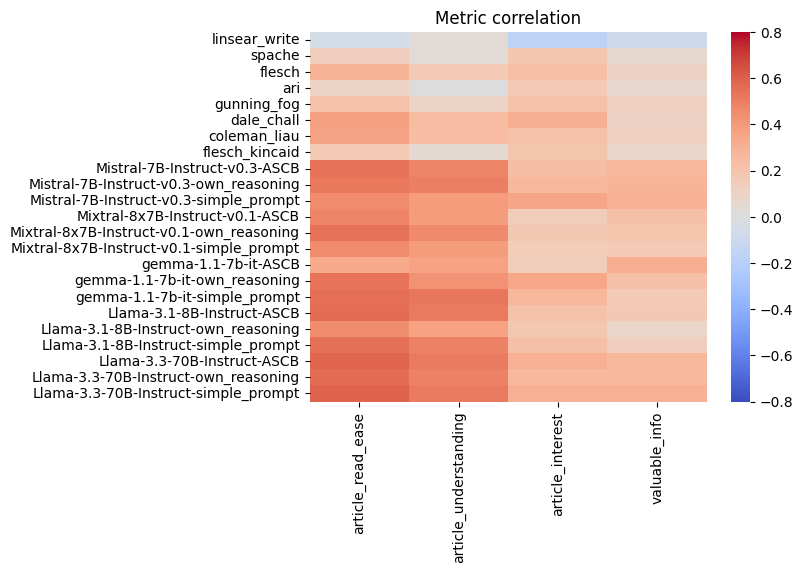

In [19]:
sns.heatmap(all_correlations_pearson, cmap='coolwarm', xticklabels=attr_names, yticklabels=all_metric_names, vmin=-0.8,vmax=0.8)
plt.title("Metric correlation")
plt.show()

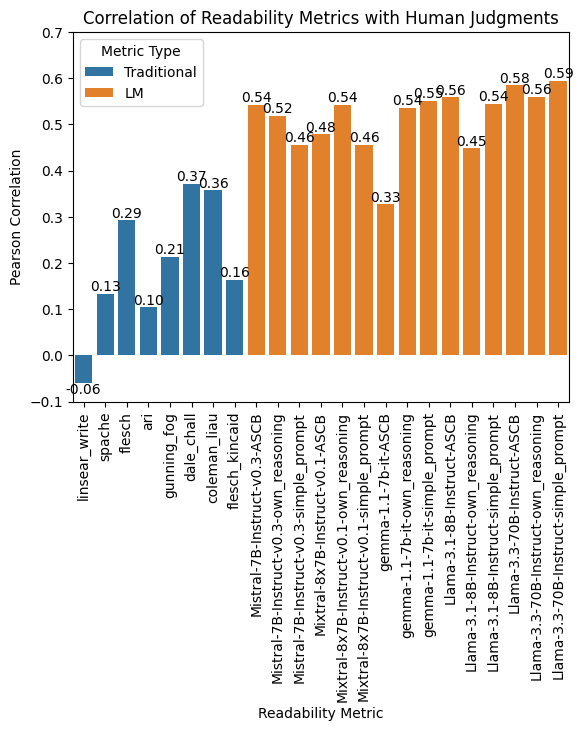

In [20]:
hue = ["Traditional"]*8 + ["LM"]*len(all_model_names)
plot_df_pearson = pd.DataFrame.from_dict(
    {
        "Pearson Correlation":all_correlations_pearson[:,0],
        "Readability Metric": all_metric_names,
        "Metric Type": hue
    }
    )

ax = sns.barplot(plot_df_pearson, x="Readability Metric", y="Pearson Correlation", hue="Metric Type")
plt.rcParams["figure.figsize"] = (12,4)
ax.tick_params(axis='x', rotation=90)
for container in ax.containers:
    ax.bar_label(container, fmt='%.02f')
plt.ylim(-0.1, 0.7)
plt.title("Correlation of Readability Metrics with Human Judgments")
plt.show()

In [44]:
plot_df_pearson['prompt_name'] = plot_df_pearson["Readability Metric"].apply(lambda x: x.split("-")[-1])
plot_df_pearson['model'] = plot_df_pearson["Readability Metric"].apply(lambda x: '-'.join(x.split("-")[:-1]))
print(plot_df_pearson.groupby("prompt_name")['Pearson Correlation'].mean())
print(plot_df_pearson.groupby("model")['Pearson Correlation'].mean())

prompt_name
ASCB              0.498294
ari               0.104089
coleman_liau      0.357557
dale_chall        0.371565
flesch            0.292150
flesch_kincaid    0.163339
gunning_fog       0.213433
linsear_write    -0.058670
own_reasoning     0.520924
simple_prompt     0.519922
spache            0.133915
Name: Pearson Correlation, dtype: float64
model
                              0.197172
Llama-3.1-8B-Instruct         0.516864
Llama-3.3-70B-Instruct        0.579353
Mistral-7B-Instruct-v0.3      0.505775
Mixtral-8x7B-Instruct-v0.1    0.491822
gemma-1.1-7b-it               0.471418
Name: Pearson Correlation, dtype: float64


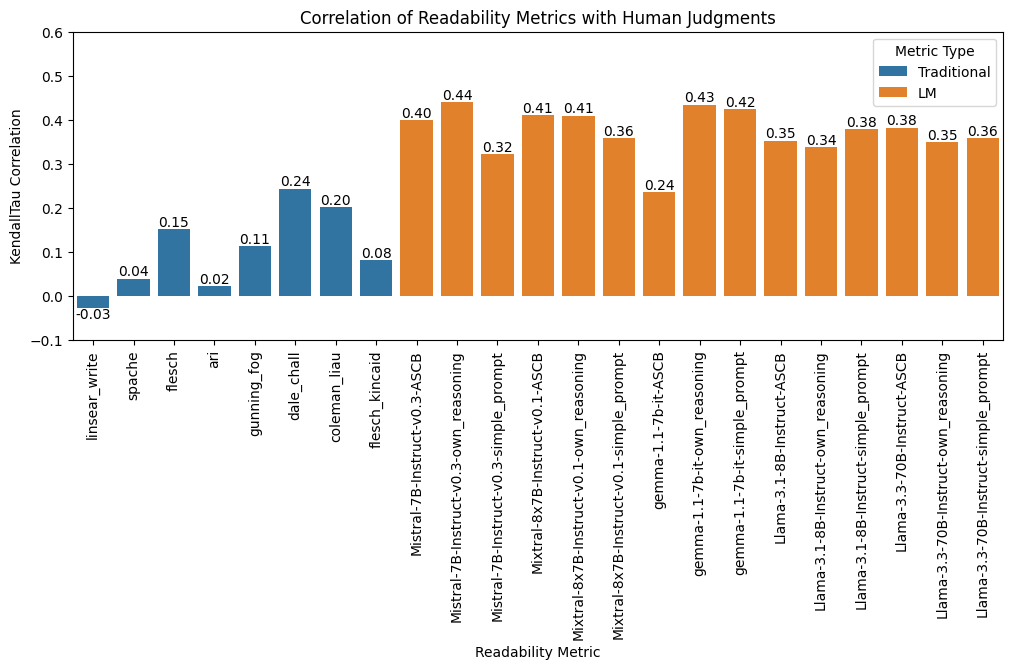

In [24]:
hue = ["Traditional"]*8 + ["LM"]*len(all_model_names)
plot_df_kt = pd.DataFrame.from_dict(
    {
        "KendallTau Correlation":all_correlations_kt[:,0],
        "Readability Metric": all_metric_names,
        "Metric Type": hue
    }
    )

ax = sns.barplot(plot_df_kt, x="Readability Metric", y="KendallTau Correlation", hue="Metric Type")
plt.rcParams["figure.figsize"] = (12,4)
ax.tick_params(axis='x', rotation=90)
for container in ax.containers:
    ax.bar_label(container, fmt='%.02f')
plt.ylim(-0.1, 0.6)
plt.title("Correlation of Readability Metrics with Human Judgments")
plt.show()

In [46]:
plot_df_kt['prompt_name'] = plot_df_kt["Readability Metric"].apply(lambda x: x.split("-")[-1])
plot_df_kt['model'] = plot_df_kt["Readability Metric"].apply(lambda x: '-'.join(x.split("-")[:-1]))
print(plot_df_kt.groupby("prompt_name")['KendallTau Correlation'].mean())
print(plot_df_kt.groupby("model")['KendallTau Correlation'].mean())

prompt_name
ASCB              0.355295
ari               0.021493
coleman_liau      0.201358
dale_chall        0.243213
flesch            0.150453
flesch_kincaid    0.080317
gunning_fog       0.113122
linsear_write    -0.027149
own_reasoning     0.393987
simple_prompt     0.368176
spache            0.038462
Name: KendallTau Correlation, dtype: float64
model
                              0.102658
Llama-3.1-8B-Instruct         0.355917
Llama-3.3-70B-Instruct        0.362960
Mistral-7B-Instruct-v0.3      0.386822
Mixtral-8x7B-Instruct-v0.1    0.392034
gemma-1.1-7b-it               0.364698
Name: KendallTau Correlation, dtype: float64


## Significance testing

In [27]:
def fisher_z_test_one_sided(r1, r2, n):
    z1 = 0.5 * np.log((1 + r1) / (1 - r1))
    z2 = 0.5 * np.log((1 + r2) / (1 - r2))
    se = np.sqrt(2 / (n - 3))
    z_stat = (z1 - z2) / se
    p_value = 1 - scipy.stats.norm.cdf(z_stat)
    return p_value

In [28]:
# Pearson
n_examples = clean_summ_df.shape[0]
n_metrics = all_correlations_pearson.shape[0]
pearson_pvals = np.zeros((n_metrics, n_metrics))
for i in range(n_metrics):
    for j in range(n_metrics):
        if i > j:
            p = fisher_z_test_one_sided(all_correlations_pearson[i,0], all_correlations_pearson[j,0], n_examples)
            pearson_pvals[i,j] = p
for row in pearson_pvals:
    print(",".join(map(str, row)))

0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.1508487524963904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.02742791624129004,0.18748121129525908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.1918030899144374,0.5641615974542893,0.8528523262745349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.07067484959412085,0.3306991522430709,0.6733681895360893,0.27441562988833546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.008267925234447304,0.08627298083844082,0.3167336574929044,0.06355505450716781,0.1772008448250727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010426937938521341,0.1006565211370849,0.3480452679913316,0.07502589579859475,0.20050012187454724,0.5343657790797707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.11634845612026357,0.4361882

In [29]:
# KT 
n_examples = clean_summ_df.shape[0]
n_metrics = all_correlations_kt.shape[0]
kt_pvals = np.zeros((n_metrics, n_metrics))
for i in range(n_metrics):
    for j in range(n_metrics):
        if i > j:
            p = fisher_z_test_one_sided(all_correlations_kt[i,0], all_correlations_kt[j,0], n_examples)
            kt_pvals[i,j] = p
for row in kt_pvals:
    print(",".join(map(str, row)))

0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.3630180141570877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.1699622371366153,0.2729513532157285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.39753466080268574,0.5361225130293206,0.7563410247649902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.22618284363438868,0.344182972804149,0.5803690061373854,0.31145038344906373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.07079107383139338,0.1314588883636949,0.30306333800626184,0.11310277307609151,0.23624061521444406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.10844860194743056,0.18823544723395025,0.3895445429339104,0.1647584876237982,0.3144257927995364,0.5929359555784264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.28275612067249434,0.41127360498

In [30]:
# Code from https://github.com/inmoonlight/nlp-williams/blob/master/williams.py
def williams_test(r12, r13, r23, n):
    """The Williams test (Evan J. Williams. 1959. Regression Analysis, volume 14. Wiley, New York, USA)
    
    A test of whether the population correlation r12 equals the population correlation r13.
    Significant: p < 0.05
    
    Arguments:
        r12 (float): correlation between x1, x2
        r13 (float): correlation between x1, x3
        r23 (float): correlation between x2, x3
        n (int): size of the population
        
    Returns:
        t (float): Williams test result
        p (float): p-value of t-dist
    """
    if r12 < r13:
        return -1, -1
    elif n <= 3:
        return -1, -1
    else:
        K = 1 - r12**2 - r13**2 - r23**2 + 2*r12*r13*r23
        denominator = np.sqrt(2*K*(n-1)/(n-3) + (((r12+r13)**2)/4)*((1-r23)**3))
        numerator = (r12-r13) * np.sqrt((n-1)*(1+r23))
        t = numerator / denominator
        p = 1 - scipy.stats.t.cdf(t, df=n-3) # changed to n-3 on 30/11/14
        return t, p

In [31]:
williams_test_pvals = np.zeros((n_metrics,n_metrics))
for i in range(n_metrics):
    for j in range(n_metrics):
        _, p = williams_test(all_correlations_pearson[i,0], all_correlations_pearson[j,0], inter_corr[i,j], n_examples)
        williams_test_pvals[i,j] = p
for i in range(n_metrics):
    for j in range(n_metrics):
        if williams_test_pvals[i,j] == -1:
            williams_test_pvals[i,j] = williams_test_pvals[j, i]
for row in williams_test_pvals:
    print(",".join(map(str, row)))

0.5,4.9621895715112885e-05,0.07764542128577623,1.4638431578006816e-09,2.220446049250313e-16,5.062709601100224e-06,7.484432880477954e-05,2.8957924946837466e-10,0.00037679110410115957,0.000651134080528859,0.004363548047893184,0.0026339042002939683,0.0006896108152431024,0.005300353432589389,0.01001162706173131,0.0009649912486863199,0.0002563151720489376,0.0002501224923605605,0.0020010794190654657,0.00012395883071592007,0.0003007976808380164,0.0003655198095796619,0.00014652276395710206
4.9621895715112885e-05,0.5,0.2571426614934538,0.20943775567748302,0.03274688204386944,0.00028140640647289494,0.0064202549158347555,0.23282686020866095,0.012240537843284272,0.015098704012632358,0.04304553011323364,0.0339447743389627,0.013517506996054807,0.05259827768622416,0.12502107682161323,0.01630427050240324,0.008435779420903566,0.010162007850072263,0.04419842659190498,0.00778088729002413,0.009280643565213409,0.011965204463151635,0.006386041715217172
0.07764542128577623,0.2571426614934538,0.5,0.2213642071

/tmp/ipykernel_158832/2416412834.py:24: RuntimeWarning: invalid value encountered in sqrt
  denominator = np.sqrt(2*K*(n-1)/(n-3) + (((r12+r13)**2)/4)*((1-r23)**3))
/tmp/ipykernel_158832/2416412834.py:26: RuntimeWarning: invalid value encountered in scalar divide
  t = numerator / denominator


In [32]:
williams_test_pvals_kt = np.zeros((n_metrics,n_metrics))
for i in range(n_metrics):
    for j in range(n_metrics):
        _, p = williams_test(all_correlations_kt[i,0], all_correlations_kt[j,0], inter_corr_kt[i,j], n_examples)
        williams_test_pvals_kt[i,j] = p
for i in range(n_metrics):
    for j in range(n_metrics):
        if williams_test_pvals_kt[i,j] == -1:
            williams_test_pvals_kt[i,j] = williams_test_pvals_kt[j, i]
for row in williams_test_pvals_kt:
    print(",".join(map(str, row)))

0.5,0.22992952730086103,0.2280217710555109,0.2503607769949885,0.04691772830364371,0.021661869339867912,0.0531072008488499,0.08287092049194056,0.011744547305077568,0.00516255210319938,0.03702250758109504,0.011048484972247752,0.010068463856127585,0.02688247823025791,0.0580933095396261,0.008183122808002263,0.005960783328170183,0.02022628384508618,0.022661982516994694,0.010412672664677047,0.020980106770283502,0.02548716611204227,0.021501297474780245
0.22992952730086103,0.5,0.31880946952690215,0.41958442143536057,0.2050636572644251,0.04107892010973779,0.11349934406373918,0.3181344511235502,0.029447675101464954,0.012632215796656854,0.06742791077389565,0.0233200789138589,0.02307771787043067,0.052012098873689405,0.12464634912155936,0.019809767600141637,0.016593947552010935,0.050551846053843774,0.054878397423105185,0.028693618444379454,0.047714694026464,0.061188493476420414,0.053921057085926316
0.2280217710555109,0.31880946952690215,0.5,0.29767119271057774,0.4398639578936665,0.34664903730989016

/tmp/ipykernel_158832/2416412834.py:24: RuntimeWarning: invalid value encountered in sqrt
  denominator = np.sqrt(2*K*(n-1)/(n-3) + (((r12+r13)**2)/4)*((1-r23)**3))
/tmp/ipykernel_158832/2416412834.py:26: RuntimeWarning: invalid value encountered in scalar divide
  t = numerator / denominator


In [33]:
hue = []
vals = []
fkgl_max = clean_summ_df['r-flesch_kincaid'].max()
fkgl_min = clean_summ_df['r-flesch_kincaid'].min()
scale_fkgl = lambda x: (x - fkgl_min)*4 / (fkgl_max - fkgl_min) + 1
for _, row in clean_summ_df.iterrows():
  for m_name in all_model_names:
    hue.append(m_name)
    vals.append(row[f'r-{m_name}'])
    hue.append('reading_ease')
    vals.append(row['s-article_read_ease'])
    hue.append('fkgl')
    vals.append(scale_fkgl(row['r-flesch_kincaid']))
df_val_dist = pd.DataFrame({"val_name": hue, "val": vals})

## Inter-annotator agreement

In [36]:
# Calculate inner annotator agreement
def aggreement_per_annotator(df, annotator_id, metric_name):
  annotator_df = df[df["uuid"]==annotator_id]
  paper_ids = annotator_df['paperId'].unique()
  scores = []
  for pid in paper_ids:
    paper_df = df[df['paperId']==pid]
    y2 = []
    this_annotator_val = annotator_df[annotator_df['paperId']==pid][metric_name].iloc[0]
    this_annotator_val = 1 if this_annotator_val > 3 else 0
    for _, row in paper_df.iterrows():
      if row['uuid'] != annotator_id:
        val = row[metric_name]
        y2.append(1 if val > 3 else 0)
    y2 = np.array(y2)
    y1 = np.full_like(y2, this_annotator_val)
    same = sum(y1==y2)
    scores.append(same/len(y1))

  return np.mean(scores)

In [37]:
aggreement_per_annotator(survey_df, '346a567a-78f4-444f-8a35-00a00efc9324', 'article_read_ease')

np.float64(0.7634293103533906)

In [38]:
survey_df['article_read_ease'].value_counts()

article_read_ease
5    652
4    531
3    298
2    180
1    118
Name: count, dtype: int64

In [39]:
def aggreement_per_attr(attr):
  n_annotators = len(survey_df['uuid'].unique())
  this_attr = []
  for i, annotator_id in enumerate(survey_df['uuid'].unique()):
    if i % 100 == 0:
      print(f'{i}/{n_annotators}')
    annotator_score = aggreement_per_annotator(survey_df, annotator_id, attr)
    this_attr.append(annotator_score)
  return this_attr

In [40]:
article_read_ease_aggreement = aggreement_per_attr('article_read_ease')
np.mean(article_read_ease_aggreement)

0/593
100/593
200/593
300/593
400/593
500/593


np.float64(0.6000919589431635)

In [41]:
article_understanding_aggreement = aggreement_per_attr('article_understanding')
np.mean(article_understanding_aggreement)

0/593
100/593
200/593
300/593
400/593
500/593


np.float64(0.6070411441150764)

In [42]:
article_interest_aggreement = aggreement_per_attr('article_interest')
np.mean(article_interest_aggreement)

0/593
100/593
200/593
300/593
400/593
500/593


np.float64(0.5262433625510443)

In [43]:
valuable_info_aggreement = aggreement_per_attr('valuable_info')
np.mean(valuable_info_aggreement)

0/593
100/593
200/593
300/593
400/593
500/593


np.float64(0.5787217490422268)